   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
     total_bill   tip     sex smoker   day    time  size
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Col

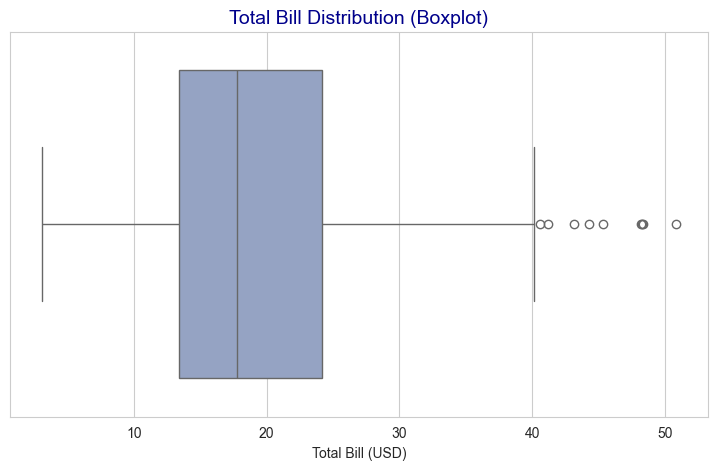

Mean of total_bill: 18.82
Median of total_bill: 17.46
Trimmed Mean (10%) of total_bill: 18.20
Range of total_bill: 37.10
Variance of total_bill: 55.42
Standard Deviation of total_bill: 7.44


C:\Users\Tarun\AppData\Local\Temp\ipykernel_26120\4272442028.py:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean[num_var], shade=True, color=custom_palette[1])


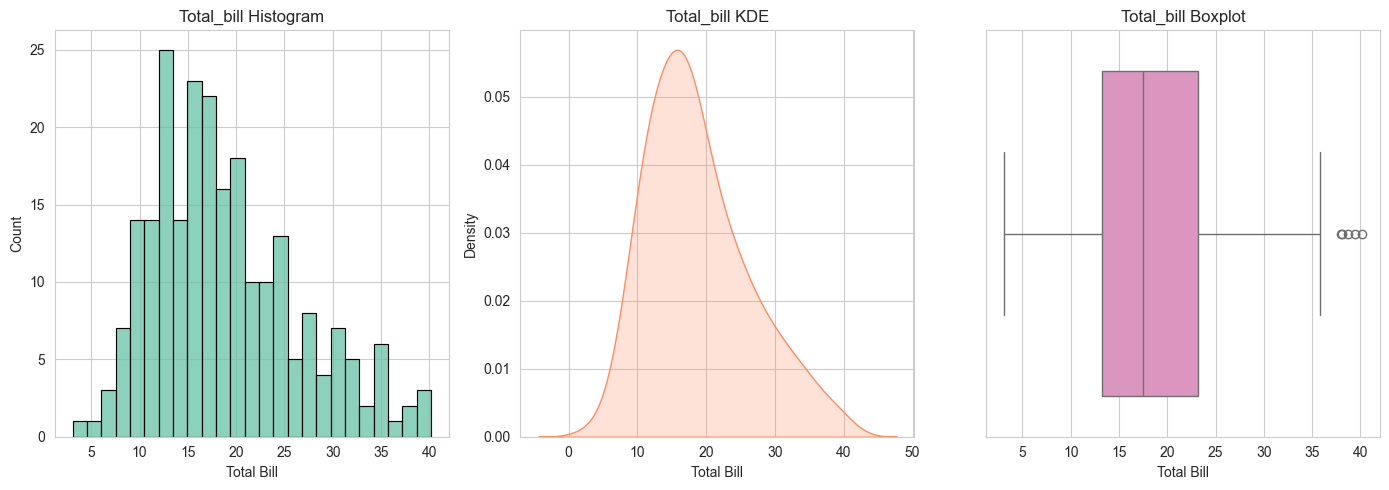

day
Sat     83
Sun     73
Thur    59
Fri     19
Name: count, dtype: int64
Most frequent day: Sat


C:\Users\Tarun\AppData\Local\Temp\ipykernel_26120\4272442028.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df_clean, palette=custom_palette, edgecolor='black')
C:\Users\Tarun\AppData\Local\Temp\ipykernel_26120\4272442028.py:86: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x='day', data=df_clean, palette=custom_palette, edgecolor='black')


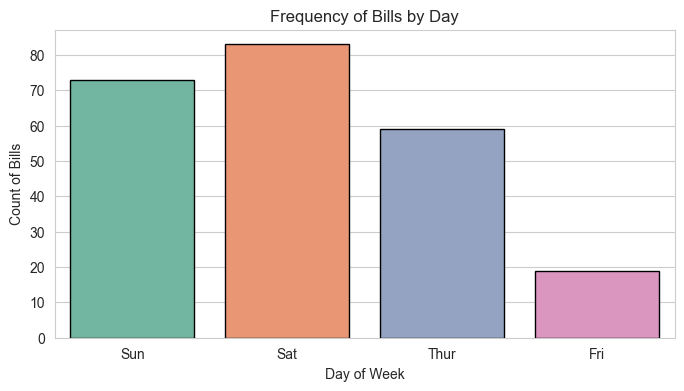

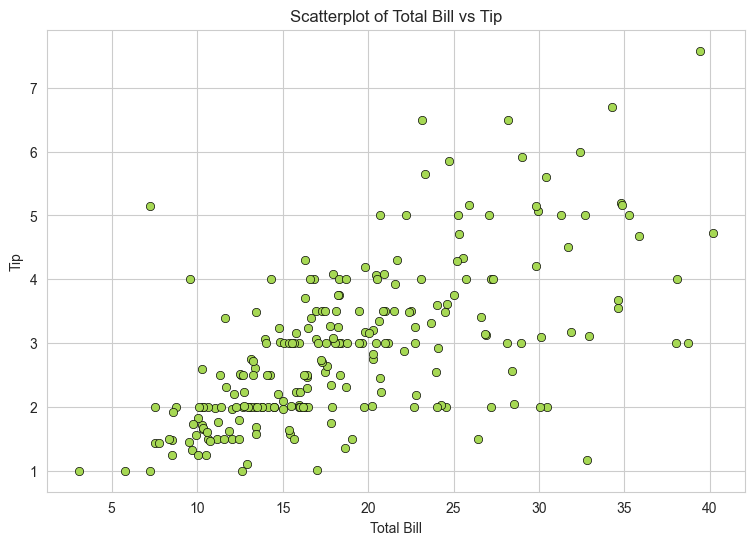

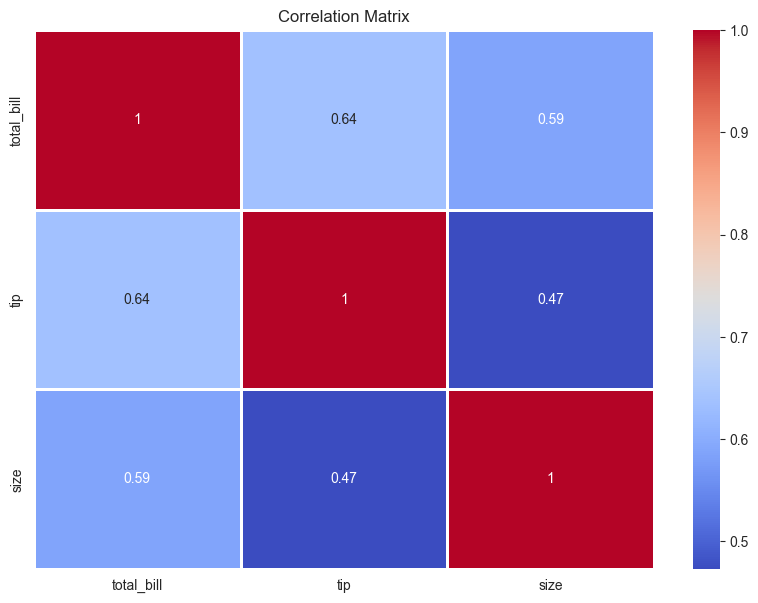

C:\Users\Tarun\AppData\Local\Temp\ipykernel_26120\4272442028.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=df_clean, palette=custom_palette)
C:\Users\Tarun\AppData\Local\Temp\ipykernel_26120\4272442028.py:111: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='day', y='total_bill', data=df_clean, palette=custom_palette)


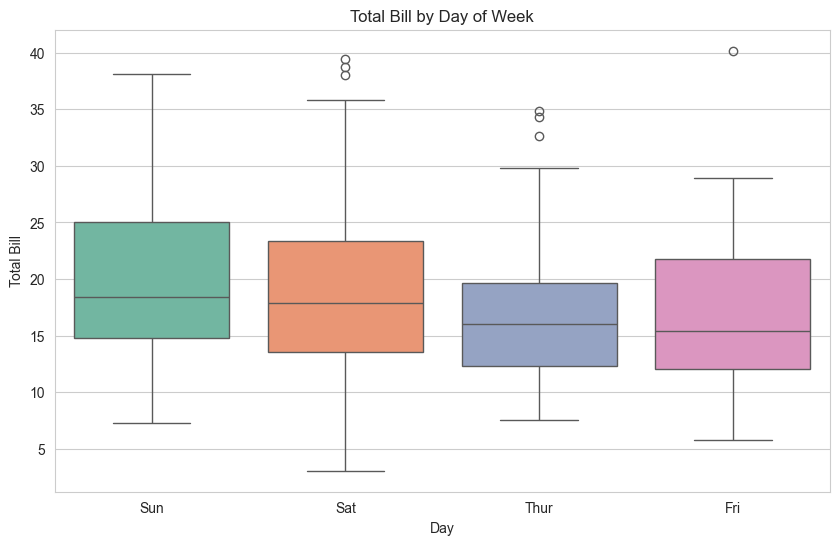

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean

# Set a different seaborn style and palette
sns.set_style("whitegrid")
custom_palette = sns.color_palette("Set2")

# 1. Load dataset
df = pd.read_csv('D:/Coding/Python/tips.csv')

# 2. Initial Data Examination
print(df.head(7))       # Print first 7 rows for an extended preview
print(df.tail(7))       # Print last 7 rows
print(df.info())        # Data types and missing information
print(df.describe().T)  # Transposed summary statistics for clearer view

# 3. Cleaning Steps

# Check missing data counts
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Since no missing data, no imputation necessary

# Duplicate records check
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

# 4. Outlier Detection and Removal

# Boxplot for 'total_bill' with customized color
plt.figure(figsize=(9,5))
sns.boxplot(x=df['total_bill'], color=custom_palette[2])
plt.title('Total Bill Distribution (Boxplot)', fontsize=14, color='darkblue')
plt.xlabel('Total Bill (USD)')
plt.show()

# Calculating IQR for outlier removal
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['total_bill'] >= lower_bound) & (df['total_bill'] <= upper_bound)]

# 5. Univariate Analysis on cleaned data

num_var = 'total_bill'
print(f"Mean of {num_var}: {df_clean[num_var].mean():.2f}")
print(f"Median of {num_var}: {df_clean[num_var].median():.2f}")
print(f"Trimmed Mean (10%) of {num_var}: {trim_mean(df_clean[num_var], 0.1):.2f}")
print(f"Range of {num_var}: {df_clean[num_var].max() - df_clean[num_var].min():.2f}")
print(f"Variance of {num_var}: {df_clean[num_var].var():.2f}")
print(f"Standard Deviation of {num_var}: {df_clean[num_var].std():.2f}")

# Plot histogram, KDE, and boxplot side-by-side with customizations
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.histplot(df_clean[num_var], bins=25, color=custom_palette[0], edgecolor='black')
plt.title(f'{num_var.capitalize()} Histogram')
plt.xlabel('Total Bill')

plt.subplot(1,3,2)
sns.kdeplot(df_clean[num_var], shade=True, color=custom_palette[1])
plt.title(f'{num_var.capitalize()} KDE')
plt.xlabel('Total Bill')

plt.subplot(1,3,3)
sns.boxplot(x=df_clean[num_var], color=custom_palette[3])
plt.title(f'{num_var.capitalize()} Boxplot')
plt.xlabel('Total Bill')

plt.tight_layout()
plt.show()

# Categorical variable: ‘day’
print(df_clean['day'].value_counts())
print(f"Most frequent day: {df_clean['day'].mode().iloc[0]}")

plt.figure(figsize=(8,4))
sns.countplot(x='day', data=df_clean, palette=custom_palette, edgecolor='black')
plt.title('Frequency of Bills by Day')
plt.xlabel('Day of Week')
plt.ylabel('Count of Bills')
plt.show()

# 6. Bivariate and Multivariate Analysis

# Scatterplot for total_bill vs tip with custom colors and formatting
plt.figure(figsize=(9,6))
sns.scatterplot(x='total_bill', y='tip', data=df_clean, color=custom_palette[4], edgecolor='black')
plt.title('Scatterplot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Correlation heatmap - numeric columns only, with diverging palette
plt.figure(figsize=(10,7))
corr_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, linecolor='white')
plt.title('Correlation Matrix')
plt.show()

# Boxplot grouped by day with palette variations
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', data=df_clean, palette=custom_palette)
plt.title('Total Bill by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()
